In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
pop = pd.read_csv('./data/서울시 상권분석서비스(길단위인구-자치구).csv', encoding='cp949', low_memory=False)
pop.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20191,11110,종로구,75174943,37418997,37755946,7564574,13679161,11910027,12384192,...,12211675,13640263,8011084,10868420,10875292,11083725,11343757,11319451,10325349,9358949
1,20191,11140,중구,64615409,32160550,32454860,5139538,10698647,12385050,11374093,...,10931280,11668403,6534645,9630185,9564536,9795540,10122990,9997620,8235164,7269374
2,20191,11170,용산구,68174599,32470460,35704139,8126790,11295328,12955266,11351904,...,8341597,11038415,8487409,9674691,9681827,9747796,9814186,9849363,9714954,9691783
3,20191,11200,성동구,78288748,37443521,40845228,11073286,12524424,13321227,12144623,...,9544559,13141971,9855189,11168653,11195181,11254695,11323103,11285456,11103159,10958501
4,20191,11215,광진구,100448729,47239683,53209045,14991774,17886384,16168074,14857188,...,10899418,16172330,13610731,14129528,14141085,14180894,14176822,14258738,14720356,14841308


In [4]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준_년분기_코드         450 non-null    int64 
 1   자치구_코드            450 non-null    int64 
 2   자치구_코드_명          450 non-null    object
 3   총_유동인구_수          450 non-null    int64 
 4   남성_유동인구_수         450 non-null    int64 
 5   여성_유동인구_수         450 non-null    int64 
 6   연령대_10_유동인구_수     450 non-null    int64 
 7   연령대_20_유동인구_수     450 non-null    int64 
 8   연령대_30_유동인구_수     450 non-null    int64 
 9   연령대_40_유동인구_수     450 non-null    int64 
 10  연령대_50_유동인구_수     450 non-null    int64 
 11  연령대_60_이상_유동인구_수  450 non-null    int64 
 12  시간대_00_06_유동인구_수  450 non-null    int64 
 13  시간대_06_11_유동인구_수  450 non-null    int64 
 14  시간대_11_14_유동인구_수  450 non-null    int64 
 15  시간대_14_17_유동인구_수  450 non-null    int64 
 16  시간대_17_21_유동인구_수  450 non-null    int64 
 17  시간대_21_24_유동인구_수

In [5]:
# 2019 1분기부터 2023 2분기 까지 각 자치구별 유동인구 데이터 추출
pop_fin = pop.groupby(['기준_년분기_코드', '자치구_코드_명']).sum()['총_유동인구_수']

In [76]:
pop_fin

기준_년분기_코드  자치구_코드_명
20191      강남구         147492570
           강동구         115429568
           강북구         105252544
           강서구         121640307
           관악구         139993667
                         ...    
20232      용산구          63775628
           은평구          98028049
           종로구          69035534
           중구           60438347
           중랑구          96598350
Name: 총_유동인구_수, Length: 450, dtype: int64

In [6]:
pop_fin.to_frame()

총_유동인구_수
기준_년분기_코드 자치구_코드_명           
20191     강남구       147492570
          강동구       115429568
          강북구       105252544
          강서구       121640307
          관악구       139993667
...                       ...
20232     용산구        63775628
          은평구        98028049
          종로구        69035534
          중구         60438347
          중랑구        96598350

[450 rows x 1 columns]

In [113]:
pop_fin = pop_fin.reset_index()

In [104]:
pop_fin

,기준_년분기_코드,자치구,유동인구
0,20191,강남구,147492570
1,20191,강동구,115429568
2,20191,강북구,105252544
3,20191,강서구,121640307
4,20191,관악구,139993667
...,...,...,...
445,20232,용산구,63775628
446,20232,은평구,98028049
447,20232,종로구,69035534
448,20232,중구,60438347


In [7]:
# 다른 dataframe과 merge하기 위하여 컬럼명 재설정
pop_fin.rename(columns = {'자치구_코드_명' : '자치구', '총_유동인구_수' : '유동인구'}, inplace = True)

TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [8]:
columns = ['기준_년분기_코드', '자치구_코드_명', '서비스_업종_코드_명', '당월_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', 
           '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
          '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
sales = pd.read_csv('./data/서울시 상권분석서비스(추정매출-자치구).csv', encoding='cp949', usecols = columns, low_memory=False)
sales.head()

,기준_년분기_코드,자치구_코드_명,서비스_업종_코드_명,당월_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
0,20191,종로구,화초,1495850124,0,222767026,361381719,348673696,541222248,21805435,465985416,614351753,4821242,236327182,286985195,225269811,249285099,77648643
1,20191,종로구,양식음식점,21733503173,413929513,123388190,6045931961,3643516680,8433242232,3073494597,8465129069,9530725644,136382198,6196833737,4967963671,3236855795,2407946855,1049872442
2,20191,종로구,치킨전문점,3247811505,382461305,74554617,182374892,148462018,1133940599,1326018074,1765155389,1134001754,40820693,927312845,698362320,599689873,471883377,161088031
3,20191,종로구,시계및귀금속,150561529485,0,4074265581,47523104816,60994758051,37787372266,182028771,69483673044,66687504758,181127570,13803201987,26143750620,26406134053,44761390011,24875573557
4,20191,종로구,일반의원,14993800118,0,2910962298,4490413329,4513260135,3047025979,32138377,6420163302,8529048076,69495695,1814359964,3318178411,3170413889,3463830467,3112932953


In [116]:
# 2019 1분기부터 2023 2분기 까지 각 자치구별 매출금액 데이터 추출
sales_fin = sales.groupby(['기준_년분기_코드', '자치구_코드_명']).sum()['당월_매출_금액']

In [117]:
sales_fin.to_frame()

당월_매출_금액
기준_년분기_코드 자치구_코드_명               
20191     강남구       2558493259968
          강동구        522826836966
          강북구        344457506558
          강서구        693863005680
          관악구        566166010396
...                           ...
20232     용산구       1398785281394
          은평구        554614275000
          종로구       1162155061176
          중구        1425429321240
          중랑구        638382999728

[450 rows x 1 columns]

In [118]:
sales_fin = sales_fin.reset_index()

In [84]:
sales_fin

,기준_년분기_코드,자치구_코드_명,당월_매출_금액
0,20191,강남구,2558493259968
1,20191,강동구,522826836966
2,20191,강북구,344457506558
3,20191,강서구,693863005680
4,20191,관악구,566166010396
...,...,...,...
445,20232,용산구,1398785281394
446,20232,은평구,554614275000
447,20232,종로구,1162155061176
448,20232,중구,1425429321240


In [122]:
# 다른 dataframe과 merge하기 위하여 컬럼명 재설정
sales_fin.rename(columns = {'기준_년분기_코드' : '분기', '자치구_코드_명' : '자치구2', '당월_매출_금액' : '매출금액'}, inplace = True)

In [123]:
# 2019~2023 매출 데이터와 유동인구 데이터를 merge하여 병합
pop_sales = pd.concat([pop_fin, sales_fin], axis = 1, join = 'inner')

In [124]:
pop_sales

,기준_년분기_코드,자치구,유동인구,분기,자치구2,매출금액
0,20191,강남구,147492570,20191,강남구,2558493259968
1,20191,강동구,115429568,20191,강동구,522826836966
2,20191,강북구,105252544,20191,강북구,344457506558
3,20191,강서구,121640307,20191,강서구,693863005680
4,20191,관악구,139993667,20191,관악구,566166010396
...,...,...,...,...,...,...
445,20232,용산구,63775628,20232,용산구,1398785281394
446,20232,은평구,98028049,20232,은평구,554614275000
447,20232,종로구,69035534,20232,종로구,1162155061176
448,20232,중구,60438347,20232,중구,1425429321240


In [125]:
# 불필요한 컬럼 drop하여 삭제
pop_sales.drop(['분기', '자치구2'], axis = 1, inplace = True)

In [128]:
# 컬럼명 재설정
pop_sales.rename(columns = {'기준_년분기_코드' : '분기'}, inplace = True)

In [129]:
pop_sales

,분기,자치구,유동인구,매출금액
0,20191,강남구,147492570,2558493259968
1,20191,강동구,115429568,522826836966
2,20191,강북구,105252544,344457506558
3,20191,강서구,121640307,693863005680
4,20191,관악구,139993667,566166010396
...,...,...,...,...
445,20232,용산구,63775628,1398785281394
446,20232,은평구,98028049,554614275000
447,20232,종로구,69035534,1162155061176
448,20232,중구,60438347,1425429321240


In [131]:
def calculate_corr(data):
    return data['유동인구'].corr(data['매출금액'])

correlations = pop_sales.groupby('자치구').apply(calculate_corr)

correlations

자치구
강남구     0.185333
강동구     0.048856
강북구    -0.104416
강서구     0.096802
관악구    -0.090398
광진구     0.000756
구로구     0.093567
금천구     0.106746
노원구    -0.285339
도봉구    -0.045828
동대문구    0.167705
동작구     0.162872
마포구     0.008205
서대문구    0.118149
서초구     0.000979
성동구    -0.046108
성북구    -0.015091
송파구    -0.006442
양천구    -0.125027
영등포구    0.236459
용산구     0.184684
은평구     0.075440
종로구     0.179803
중구      0.143752
중랑구    -0.028293
dtype: float64

In [135]:
correlations = correlations.to_frame()

In [150]:
# 컬럼명 재설정
correlations.rename(columns = {0 : '상관계수'}, inplace = True)

In [145]:
correlations = correlations.reset_index()

In [152]:
correlations

,자치구,상관계수
0,강남구,0.185333
1,강동구,0.048856
2,강북구,-0.104416
3,강서구,0.096802
4,관악구,-0.090398
5,광진구,0.000756
6,구로구,0.093567
7,금천구,0.106746
8,노원구,-0.285339
9,도봉구,-0.045828


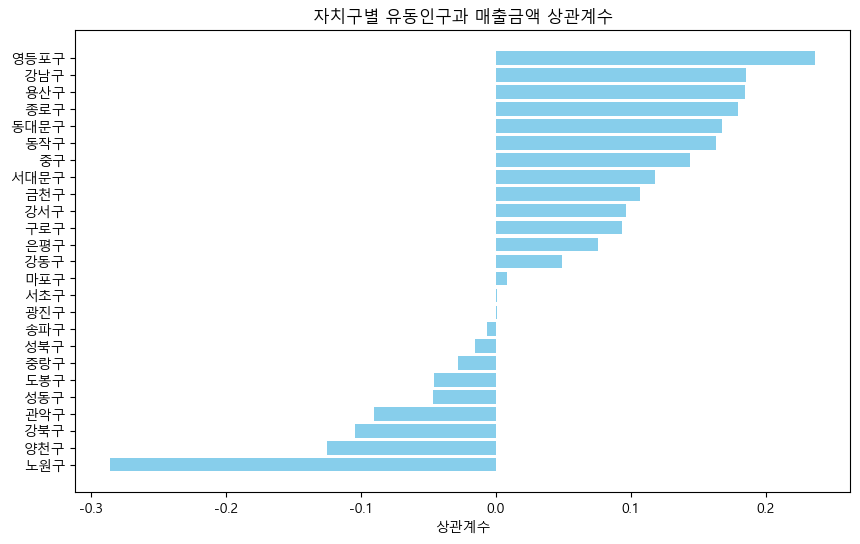

In [159]:
plt.figure(figsize = (10, 6))
sorted_correlations = correlations.sort_values(by = '상관계수', ascending = True)
plt.barh(sorted_correlations['자치구'], sorted_correlations['상관계수'], color = 'skyblue')
plt.xlabel('상관계수')
plt.title('자치구별 유동인구과 매출금액 상관계수')
plt.show()

## 종로구 행정동별 데이터 전처리

In [4]:
pop_dong = pd.read_csv('./data/서울시 상권분석서비스(길단위인구-행정동).csv', encoding='cp949', low_memory=False)
pop_dong.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20191,11680531,논현2동,11183375,5543366,5640010,944451,2225363,2808767,2066050,...,1803572,2031575,1172913,1659400,1677522,1735786,1786794,1736149,1366901,1220824
1,20191,11680545,압구정동,8607650,3916486,4691164,1094191,1450907,1729565,1505968,...,1471914,1726021,915644,1220128,1248281,1277257,1328286,1337061,1179721,1016914
2,20191,11680565,청담동,9810656,4548525,5262131,1103971,1625456,2116634,1750156,...,1466970,1702970,1094556,1386197,1426872,1461306,1503777,1506003,1349955,1176546
3,20191,11680580,삼성1동,5909316,2965347,2943970,568090,979347,1384574,1173519,...,1007174,1081661,576423,879429,878754,907463,946688,919721,721373,655889
4,20191,11680590,삼성2동,9146130,4432466,4713663,1256244,1420171,2023253,1813641,...,1258703,1464042,1037184,1360890,1359971,1391206,1423723,1388854,1152540,1068943


In [5]:
res = pop_dong.행정동_코드_명.str.contains('청운효자동|사직동|삼청동|부암동|평창동|무악동|교남동|가회동|종로|이화동|혜화동|창신|숭인', 
                                       na=False)
pop_jongro = pop_dong[res]
pop_jongro.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
360,20191,11110515,청운효자동,3668225,1693148,1975079,604553,542715,581784,682867,...,460874,558750,434296,528566,528092,533157,540482,534862,505661,497404
361,20191,11110530,사직동,4628956,2290446,2338512,403260,752637,920942,904937,...,820984,887499,442738,682476,685164,709260,729241,717359,570596,534862
362,20191,11110540,삼청동,1010831,486563,524268,97480,152090,189542,182516,...,186331,173031,87952,142143,144846,146730,150008,152319,144807,129977
363,20191,11110550,부암동,1053668,468695,584973,169130,143980,124425,159491,...,125124,164822,132619,152370,152256,152123,150560,147122,148571,150668
364,20191,11110560,평창동,1139144,497078,642067,188796,119637,120384,165176,...,127608,173849,148127,161708,162637,161310,161151,159959,164827,167552


In [6]:
pop_jongro = pop_jongro[(pop_jongro['기준_년분기_코드'] == 20221) | (pop_jongro['기준_년분기_코드'] == 20222) | (pop_jongro['기준_년분기_코드'] == 20223) | (pop_jongro['기준_년분기_코드'] == 20224) |(pop_jongro['기준_년분기_코드'] == 20231) | (pop_jongro['기준_년분기_코드'] == 20232)]

In [7]:
# 2019 1분기부터 2023 2분기 까지 종로구 각 행정동별 매출금액 데이터 추출
pop_fin = pop_jongro.groupby(['기준_년분기_코드', '행정동_코드_명']).sum()['총_유동인구_수']

In [8]:
pop_fin.to_frame()

총_유동인구_수
기준_년분기_코드 행정동_코드_명          
20221     가회동        1255813
          교남동        3853931
          무악동        1859503
          부암동        1283546
          사직동        3402653
...                      ...
20232     창신2동       5728461
          창신3동       1168610
          청운효자동      3662829
          평창동         785436
          혜화동        9677349

[102 rows x 1 columns]

In [9]:
pop_fin = pop_fin.reset_index()

In [9]:
pop_fin

,기준_년분기_코드,행정동_코드_명,총_유동인구_수
0,20221,가회동,1255813
1,20221,교남동,3853931
2,20221,무악동,1859503
3,20221,부암동,1283546
4,20221,사직동,3402653
...,...,...,...
97,20232,창신2동,5728461
98,20232,창신3동,1168610
99,20232,청운효자동,3662829
100,20232,평창동,785436


In [10]:
columns = ['기준_년분기_코드', '행정동_코드_명', '서비스_업종_코드_명', '당월_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', 
           '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
          '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
sales_dong = pd.read_csv('./data/서울시 상권분석서비스(추정매출-행정동) 2023.csv', encoding='cp949', usecols = columns, low_memory=False)
sales_dong.head()

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
0,20221,청운효자동,한식음식점,3015376427,4138713,43136687,1035666304,505957809,1245024432,181452482,1434937972,1067839785,15043906,555821260,597689900,469728912,498345036,366148732
1,20221,청운효자동,중식음식점,42685883,0,10731486,31954397,0,0,0,23007165,13346233,123276,2095689,9875044,10724999,9180806,4353584
2,20221,청운효자동,일식음식점,211421345,0,0,98495932,37246935,69960569,5717909,84486641,106747072,3768954,78863970,41775715,27590027,28762998,10472050
3,20221,청운효자동,양식음식점,1896392629,827868,55490,448428270,380949892,920433257,145697852,711950409,1018896584,8236965,599922842,653221292,193053003,193326591,83086301
4,20221,청운효자동,제과점,924397262,0,68074832,252472308,389048842,209076718,5724562,313389937,585383732,3759963,240204271,254952147,179536796,145755301,74565190


In [6]:
set(sales_dong.기준_년분기_코드.values)

{20221, 20222, 20223, 20224, 20231, 20232}

In [11]:
res = sales_dong.행정동_코드_명.str.contains('청운효자동|사직동|삼청동|부암동|평창동|무악동|교남동|가회동|종로|이화동|혜화동|창신|숭인', 
                                       na=False)
sales_jongro = sales_dong[res]
sales_jongro.head()

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
0,20221,청운효자동,한식음식점,3015376427,4138713,43136687,1035666304,505957809,1245024432,181452482,1434937972,1067839785,15043906,555821260,597689900,469728912,498345036,366148732
1,20221,청운효자동,중식음식점,42685883,0,10731486,31954397,0,0,0,23007165,13346233,123276,2095689,9875044,10724999,9180806,4353584
2,20221,청운효자동,일식음식점,211421345,0,0,98495932,37246935,69960569,5717909,84486641,106747072,3768954,78863970,41775715,27590027,28762998,10472050
3,20221,청운효자동,양식음식점,1896392629,827868,55490,448428270,380949892,920433257,145697852,711950409,1018896584,8236965,599922842,653221292,193053003,193326591,83086301
4,20221,청운효자동,제과점,924397262,0,68074832,252472308,389048842,209076718,5724562,313389937,585383732,3759963,240204271,254952147,179536796,145755301,74565190


In [10]:
set(sales_jongro.행정동_코드_명.values)

{'가회동',
 '교남동',
 '무악동',
 '부암동',
 '사직동',
 '삼청동',
 '숭인1동',
 '숭인2동',
 '이화동',
 '종로1?2?3?4가동',
 '종로5?6가동',
 '창신1동',
 '창신2동',
 '창신3동',
 '청운효자동',
 '평창동',
 '혜화동'}

In [12]:
# 2019 1분기부터 2023 2분기 까지 종로구 각 행정동별 매출금액 데이터 추출
jongro_fin = sales_jongro.groupby(['기준_년분기_코드', '행정동_코드_명', '서비스_업종_코드_명']).sum()['당월_매출_금액']

In [13]:
jongro_fin.to_frame()

당월_매출_금액
기준_년분기_코드 행정동_코드_명 서비스_업종_코드_명            
20221     가회동      가방             92096204
                   노래방            12810516
                   당구장             1201384
                   문구            100802043
                   미용실            56030015
...                                    ...
20232     혜화동      한의원           380955405
                   핸드폰           182660426
                   호프-간이주점      2303848941
                   화장품          5845024381
                   화초            216584640

[3033 rows x 1 columns]

In [14]:
jongro_fin = jongro_fin.reset_index()

In [74]:
jongro_fin

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액
0,20221,가회동,가방,92096204
1,20221,가회동,노래방,12810516
2,20221,가회동,당구장,1201384
3,20221,가회동,문구,100802043
4,20221,가회동,미용실,56030015
...,...,...,...,...
3028,20232,혜화동,한의원,380955405
3029,20232,혜화동,핸드폰,182660426
3030,20232,혜화동,호프-간이주점,2303848941
3031,20232,혜화동,화장품,5845024381


In [15]:
job_dong = pd.read_csv('./data/서울시 상권분석서비스(직장인구-행정동).csv', encoding='cp949', low_memory=False)
job_dong.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20191,11110600,가회동,22078,18464,3614,36,2844,8418,5997,...,7075,5310,3712,583,19,1077,1343,687,337,151
1,20191,11110560,평창동,2458,1110,1348,6,340,515,525,...,235,261,239,266,2,235,280,264,344,223
2,20191,11110650,혜화동,5330,2736,2594,20,907,1322,1338,...,591,716,657,421,12,564,731,622,458,207
3,20191,11140650,신당5동,2047,908,1139,6,288,511,484,...,238,228,192,143,3,184,273,256,276,147
4,20191,11170660,이태원2동,2658,1434,1224,15,485,679,481,...,378,257,224,341,5,261,301,224,201,232


In [16]:
res = job_dong.행정동_코드_명.str.contains('청운효자동|사직동|삼청동|부암동|평창동|무악동|교남동|가회동|종로|이화동|혜화동|창신|숭인', 
                                       na=False)
job_jongro = job_dong[res]
job_jongro.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20191,11110600,가회동,22078,18464,3614,36,2844,8418,5997,...,7075,5310,3712,583,19,1077,1343,687,337,151
1,20191,11110560,평창동,2458,1110,1348,6,340,515,525,...,235,261,239,266,2,235,280,264,344,223
2,20191,11110650,혜화동,5330,2736,2594,20,907,1322,1338,...,591,716,657,421,12,564,731,622,458,207
47,20191,11110615,종로1?2?3?4가동,143437,86341,57096,2454,28973,42527,37608,...,24480,25653,17391,5269,1399,16480,18047,11955,6501,2714
104,20191,11110630,종로5?6가동,19684,12214,7470,404,3378,5487,5334,...,3489,3587,2440,1036,283,1837,1998,1747,1110,495


In [17]:
job_jongro = job_jongro[(job_jongro['기준_년분기_코드'] == 20221) | (job_jongro['기준_년분기_코드'] == 20222) | (job_jongro['기준_년분기_코드'] == 20223) | (job_jongro['기준_년분기_코드'] == 20224) |(job_jongro['기준_년분기_코드'] == 20231) | (job_jongro['기준_년분기_코드'] == 20232)]

In [18]:
# 2019 1분기부터 2023 2분기 까지 종로구 각 행정동별 매출금액 데이터 추출
job_fin = job_jongro.groupby(['기준_년분기_코드', '행정동_코드_명']).sum()['총_직장_인구_수']

In [19]:
job_fin.to_frame()

총_직장_인구_수
기준_년분기_코드 행정동_코드_명           
20221     가회동           11728
          교남동             847
          무악동             608
          부암동            4115
          사직동           47822
...                       ...
20232     창신2동            344
          창신3동            300
          청운효자동         10628
          평창동           23179
          혜화동            6669

[102 rows x 1 columns]

In [20]:
job_fin = job_fin.reset_index()

In [24]:
job_fin

,기준_년분기_코드,행정동_코드_명,총_직장_인구_수
0,20221,가회동,11728
1,20221,교남동,847
2,20221,무악동,608
3,20221,부암동,4115
4,20221,사직동,47822
...,...,...,...
97,20232,창신2동,344
98,20232,창신3동,300
99,20232,청운효자동,10628
100,20232,평창동,23179


In [21]:
apart_dong = pd.read_csv('./data/서울시 상권분석서비스(아파트-행정동).csv', encoding='cp949', low_memory=False)
apart_dong.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가
0,20231,11350710,상계9동,71,539.0,313.0,NaN,NaN,NaN,NaN,24.0,294.0,235.0,275.0,24.0,NaN,59,354541080
1,20232,11110650,혜화동,308,1681.0,533.0,94.0,43.0,23.0,655.0,673.0,631.0,236.0,100.0,28.0,51.0,57,189567695
2,20231,11110650,혜화동,308,1681.0,533.0,94.0,43.0,23.0,655.0,673.0,631.0,236.0,100.0,28.0,51.0,57,189567695
3,20232,11110670,창신1동,24,147.0,50.0,NaN,NaN,NaN,17.0,84.0,58.0,2.0,15.0,6.0,15.0,48,210739429
4,20231,11110670,창신1동,24,147.0,50.0,NaN,NaN,NaN,17.0,84.0,58.0,2.0,15.0,6.0,15.0,48,210739429


In [22]:
res = apart_dong.행정동_코드_명.str.contains('청운효자동|사직동|삼청동|부암동|평창동|무악동|교남동|가회동|종로|이화동|혜화동|창신|숭인', 
                                       na=False)
apart_jongro = apart_dong[res]
apart_jongro.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가
1,20232,11110650,혜화동,308,1681.0,533.0,94.0,43.0,23.0,655.0,673.0,631.0,236.0,100.0,28.0,51.0,57,189567695
2,20231,11110650,혜화동,308,1681.0,533.0,94.0,43.0,23.0,655.0,673.0,631.0,236.0,100.0,28.0,51.0,57,189567695
3,20232,11110670,창신1동,24,147.0,50.0,NaN,NaN,NaN,17.0,84.0,58.0,2.0,15.0,6.0,15.0,48,210739429
4,20231,11110670,창신1동,24,147.0,50.0,NaN,NaN,NaN,17.0,84.0,58.0,2.0,15.0,6.0,15.0,48,210739429
6,20232,11110515,청운효자동,323,1533.0,581.0,83.0,91.0,117.0,231.0,689.0,834.0,279.0,84.0,68.0,220.0,69,276146690


In [23]:
apart_jongro = apart_jongro[(apart_jongro['기준_년분기_코드'] == 20221) | (apart_jongro['기준_년분기_코드'] == 20222) | (apart_jongro['기준_년분기_코드'] == 20223) | (apart_jongro['기준_년분기_코드'] == 20224) | (apart_jongro['기준_년분기_코드'] == 20231) | (apart_jongro['기준_년분기_코드'] == 20232)]

In [24]:
# 2019 1분기부터 2023 2분기 까지 종로구 각 행정동별 매출금액 데이터 추출
apart_fin = apart_jongro.groupby(['기준_년분기_코드', '행정동_코드_명']).sum()['아파트_단지_수']

In [25]:
apart_fin.to_frame()

아파트_단지_수
기준_년분기_코드 행정동_코드_명          
20221     가회동            126
          교남동            229
          무악동             44
          부암동            189
          사직동             87
...                      ...
20232     창신2동           214
          창신3동            26
          청운효자동          323
          평창동            294
          혜화동            308

[102 rows x 1 columns]

In [26]:
apart_fin = apart_fin.reset_index()

In [132]:
apart_fin

,기준_년분기_코드,행정동_코드_명,아파트_단지_수
0,20221,가회동,126
1,20221,교남동,229
2,20221,무악동,44
3,20221,부암동,189
4,20221,사직동,87
...,...,...,...
97,20232,창신2동,214
98,20232,창신3동,26
99,20232,청운효자동,323
100,20232,평창동,294


In [32]:
apart_fin

,기준_년분기_코드,행정동_코드_명,아파트_단지_수
0,20221,개봉3동,434
1,20221,거여1동,180
2,20221,거여2동,122
3,20221,남현동,305
4,20221,망원1동,514
...,...,...,...
104,20232,신대방1동,137
105,20232,연희동,661
106,20232,청파동,457
107,20232,혜화동,308


In [27]:
infra_dong = pd.read_csv('./data/서울시 상권분석서비스(집객시설-행정동).csv', encoding='cp949', low_memory=False)
infra_dong.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,20232,11170700,보광동,70,4.0,1.0,NaN,NaN,8.0,1.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
1,20232,11350700,상계8동,92,3.0,3.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15.0
2,20232,11110710,숭인2동,89,4.0,3.0,NaN,1.0,4.0,NaN,...,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,2.0,6.0
3,20231,11110710,숭인2동,89,4.0,3.0,NaN,1.0,4.0,NaN,...,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,2.0,6.0
4,20232,11140520,소공동,231,13.0,29.0,NaN,NaN,10.0,NaN,...,NaN,1.0,NaN,3.0,3.0,NaN,NaN,NaN,3.0,37.0


In [28]:
res = infra_dong.행정동_코드_명.str.contains('청운효자동|사직동|삼청동|부암동|평창동|무악동|교남동|가회동|종로|이화동|혜화동|창신|숭인', 
                                       na=False)
infra_jongro = infra_dong[res]
infra_jongro.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
2,20232,11110710,숭인2동,89,4.0,3.0,NaN,1.0,4.0,NaN,...,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,2.0,6.0
3,20231,11110710,숭인2동,89,4.0,3.0,NaN,1.0,4.0,NaN,...,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,2.0,6.0
18,20232,11110515,청운효자동,93,6.0,3.0,NaN,NaN,4.0,1.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0
19,20231,11110515,청운효자동,93,6.0,3.0,NaN,NaN,4.0,1.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0
20,20232,11110530,사직동,206,18.0,24.0,NaN,NaN,15.0,NaN,...,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,34.0


In [29]:
infra_jongro = infra_jongro[(infra_jongro['기준_년분기_코드'] == 20221) | (infra_jongro['기준_년분기_코드'] == 20222) | (infra_jongro['기준_년분기_코드'] == 20223) | (infra_jongro['기준_년분기_코드'] == 20224) | (infra_jongro['기준_년분기_코드'] == 20231) | (infra_jongro['기준_년분기_코드'] == 20232)]

In [30]:
infra_jongro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 2 to 4650
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준_년분기_코드  102 non-null    int64  
 1   행정동_코드     102 non-null    int64  
 2   행정동_코드_명   102 non-null    object 
 3   집객시설_수     102 non-null    int64  
 4   관공서_수      102 non-null    float64
 5   은행_수       96 non-null     float64
 6   종합병원_수     18 non-null     float64
 7   일반_병원_수    18 non-null     float64
 8   약국_수       102 non-null    float64
 9   유치원_수      48 non-null     float64
 10  초등학교_수     60 non-null     float64
 11  중학교_수      36 non-null     float64
 12  고등학교_수     54 non-null     float64
 13  대학교_수      66 non-null     float64
 14  백화점_수      0 non-null      float64
 15  슈퍼마켓_수     24 non-null     float64
 16  극장_수       18 non-null     float64
 17  숙박_시설_수    24 non-null     float64
 18  공항_수       0 non-null      float64
 19  철도_역_수     0 non-null      float64
 20  버스_터미널_수   0 n

In [45]:
# 각 컬럼별 결측치 확인
infra_jongro.isnull().sum(axis = 0)

기준_년분기_코드      0
행정동_코드         0
행정동_코드_명       0
집객시설_수         0
관공서_수          0
은행_수           6
종합병원_수        84
일반_병원_수       84
약국_수           0
유치원_수         54
초등학교_수        42
중학교_수         66
고등학교_수        48
대학교_수         36
백화점_수        102
슈퍼마켓_수        78
극장_수          84
숙박_시설_수       78
공항_수         102
철도_역_수       102
버스_터미널_수     102
지하철_역_수       54
버스_정거장_수       6
dtype: int64

In [31]:
# 각 결측치 0값으로 변환
infra_jongro.fillna(0, inplace=True)

In [32]:
# 각 컬럼별 결측치 재확인
infra_jongro.isnull().sum(axis = 0)

기준_년분기_코드    0
행정동_코드       0
행정동_코드_명     0
집객시설_수       0
관공서_수        0
은행_수         0
종합병원_수       0
일반_병원_수      0
약국_수         0
유치원_수        0
초등학교_수       0
중학교_수        0
고등학교_수       0
대학교_수        0
백화점_수        0
슈퍼마켓_수       0
극장_수         0
숙박_시설_수      0
공항_수         0
철도_역_수       0
버스_터미널_수     0
지하철_역_수      0
버스_정거장_수     0
dtype: int64

In [33]:
# 교통관련 데이터 하나로 병합
infra_jongro['교통'] = infra_jongro['공항_수'] + infra_jongro['철도_역_수'] + infra_jongro['버스_터미널_수'] + infra_jongro['지하철_역_수'] + infra_jongro['버스_정거장_수']

In [34]:
# 의료시설관련 데이터 하나로 병합
infra_jongro['의료'] = infra_jongro['종합병원_수'] + infra_jongro['일반_병원_수'] + infra_jongro['약국_수']

In [35]:
# 교육시설관련 데이터 하나로 병합
infra_jongro['교육'] = infra_jongro['유치원_수'] + infra_jongro['초등학교_수'] + infra_jongro['중학교_수'] + infra_jongro['고등학교_수'] + infra_jongro['대학교_수']

In [36]:
# 나머지 기반시설관련 데이터 하나로 병합
infra_jongro['기타'] = infra_jongro['관공서_수'] + infra_jongro['은행_수'] + infra_jongro['백화점_수'] + infra_jongro['슈퍼마켓_수'] + infra_jongro['극장_수'] + infra_jongro['숙박_시설_수']

In [52]:
infra_jongro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 2 to 4650
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준_년분기_코드  102 non-null    int64  
 1   행정동_코드     102 non-null    int64  
 2   행정동_코드_명   102 non-null    object 
 3   집객시설_수     102 non-null    int64  
 4   관공서_수      102 non-null    float64
 5   은행_수       102 non-null    float64
 6   종합병원_수     102 non-null    float64
 7   일반_병원_수    102 non-null    float64
 8   약국_수       102 non-null    float64
 9   유치원_수      102 non-null    float64
 10  초등학교_수     102 non-null    float64
 11  중학교_수      102 non-null    float64
 12  고등학교_수     102 non-null    float64
 13  대학교_수      102 non-null    float64
 14  백화점_수      102 non-null    float64
 15  슈퍼마켓_수     102 non-null    float64
 16  극장_수       102 non-null    float64
 17  숙박_시설_수    102 non-null    float64
 18  공항_수       102 non-null    float64
 19  철도_역_수     102 non-null    float64
 20  버스_터미널_수   102

In [37]:
# 2019 1분기부터 2023 2분기 까지 종로구 각 행정동별 매출금액 데이터 추출
infra_fin = infra_jongro.groupby(['기준_년분기_코드', '행정동_코드_명']).sum()[['교통', '의료', '교육', '기타']]

In [38]:
infra_fin = infra_fin.reset_index()

In [39]:
infra_fin[['교통', '의료', '교육', '기타']] = infra_fin[['교통', '의료', '교육', '기타']].astype(int)

In [40]:
infra_fin

,기준_년분기_코드,행정동_코드_명,교통,의료,교육,기타
0,20221,가회동,22,1,6,8
1,20221,교남동,26,19,2,7
2,20221,무악동,8,5,2,3
3,20221,부암동,38,1,19,6
4,20221,사직동,36,15,3,45
...,...,...,...,...,...,...
97,20232,창신2동,0,5,0,3
98,20232,창신3동,6,1,2,3
99,20232,청운효자동,26,4,14,9
100,20232,평창동,91,6,4,8


In [41]:
market_dong = pd.read_csv('./data/서울시 상권분석서비스(점포-행정동).csv', encoding='cp949', low_memory=False)
market_dong.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20221,11110515,청운효자동,CS100001,한식음식점,92,93,2,2,3,3,1
1,20221,11110515,청운효자동,CS100002,중식음식점,3,3,0,0,0,0,0
2,20221,11110515,청운효자동,CS100003,일식음식점,12,12,8,1,0,0,0
3,20221,11110515,청운효자동,CS100004,양식음식점,46,46,0,0,2,1,0
4,20221,11110515,청운효자동,CS100005,제과점,22,23,13,3,0,0,1


In [42]:
res = market_dong.행정동_코드_명.str.contains('청운효자동|사직동|삼청동|부암동|평창동|무악동|교남동|가회동|종로|이화동|혜화동|창신|숭인', 
                                       na=False)
market_jongro = market_dong[res]
market_jongro.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20221,11110515,청운효자동,CS100001,한식음식점,92,93,2,2,3,3,1
1,20221,11110515,청운효자동,CS100002,중식음식점,3,3,0,0,0,0,0
2,20221,11110515,청운효자동,CS100003,일식음식점,12,12,8,1,0,0,0
3,20221,11110515,청운효자동,CS100004,양식음식점,46,46,0,0,2,1,0
4,20221,11110515,청운효자동,CS100005,제과점,22,23,13,3,0,0,1


In [43]:
market_jongro = market_jongro[(market_jongro['기준_년분기_코드'] == 20221) | (market_jongro['기준_년분기_코드'] == 20222) | (market_jongro['기준_년분기_코드'] == 20223) | (market_jongro['기준_년분기_코드'] == 20224) | (market_jongro['기준_년분기_코드'] == 20231) | (market_jongro['기준_년분기_코드'] == 20232)]

In [44]:
# 2019 1분기부터 2023 2분기 까지 종로구 각 행정동별 매출금액 데이터 추출
market_fin = market_jongro.groupby(['기준_년분기_코드', '행정동_코드_명', '서비스_업종_코드_명']).sum()[['점포_수']]

In [118]:
market_fin.to_csv('./data/market_fin.csv')

In [119]:
jongro_fin.to_csv('./data/jongro_fin.csv')

In [61]:
market_fin

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,점포_수
0,20221,가회동,가구,3
1,20221,가회동,가방,8
2,20221,가회동,가전제품,1
3,20221,가회동,가전제품수리,1
4,20221,가회동,가정용품임대,1
...,...,...,...,...
7637,20232,혜화동,한의원,6
7638,20232,혜화동,핸드폰,16
7639,20232,혜화동,호프-간이주점,34
7640,20232,혜화동,화장품,27


In [45]:
merge1 = pd.merge(jongro_fin, market_fin, how='inner', on=['기준_년분기_코드', '행정동_코드_명', '서비스_업종_코드_명'])

In [138]:
merge1

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,점포_수
0,20221,가회동,가방,92096204,8
1,20221,가회동,노래방,12810516,4
2,20221,가회동,당구장,1201384,4
3,20221,가회동,문구,100802043,7
4,20221,가회동,미용실,56030015,7
...,...,...,...,...,...
3028,20232,혜화동,한의원,380955405,6
3029,20232,혜화동,핸드폰,182660426,16
3030,20232,혜화동,호프-간이주점,2303848941,34
3031,20232,혜화동,화장품,5845024381,27


In [94]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3033 entries, 0 to 3032
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년분기_코드    3033 non-null   int64 
 1   행정동_코드_명     3033 non-null   object
 2   서비스_업종_코드_명  3033 non-null   object
 3   당월_매출_금액     3033 non-null   int32 
 4   점포_수         3033 non-null   int64 
dtypes: int32(1), int64(2), object(2)
memory usage: 130.3+ KB


In [46]:
merge2 = pd.merge(merge1, job_fin, how = 'inner', on = ['기준_년분기_코드', '행정동_코드_명'])

In [144]:
merge2

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,점포_수,총_직장_인구_수
0,20221,가회동,가방,92096204,8,11728
1,20221,가회동,노래방,12810516,4,11728
2,20221,가회동,당구장,1201384,4,11728
3,20221,가회동,문구,100802043,7,11728
4,20221,가회동,미용실,56030015,7,11728
...,...,...,...,...,...,...
3028,20232,혜화동,한의원,380955405,6,6669
3029,20232,혜화동,핸드폰,182660426,16,6669
3030,20232,혜화동,호프-간이주점,2303848941,34,6669
3031,20232,혜화동,화장품,5845024381,27,6669


In [47]:
merge3 = pd.merge(merge2, apart_fin, how = 'inner', on = ['기준_년분기_코드', '행정동_코드_명'])

In [146]:
merge3

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,점포_수,총_직장_인구_수,아파트_단지_수
0,20221,가회동,가방,92096204,8,11728,126
1,20221,가회동,노래방,12810516,4,11728,126
2,20221,가회동,당구장,1201384,4,11728,126
3,20221,가회동,문구,100802043,7,11728,126
4,20221,가회동,미용실,56030015,7,11728,126
...,...,...,...,...,...,...,...
3028,20232,혜화동,한의원,380955405,6,6669,308
3029,20232,혜화동,핸드폰,182660426,16,6669,308
3030,20232,혜화동,호프-간이주점,2303848941,34,6669,308
3031,20232,혜화동,화장품,5845024381,27,6669,308


In [48]:
merge4 = pd.merge(merge3, infra_fin, how = 'inner', on = ['기준_년분기_코드', '행정동_코드_명'])

In [164]:
merge4

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,점포_수,총_직장_인구_수,아파트_단지_수,교통,의료,교육,기타
0,20221,가회동,가방,92096204,8,11728,126,22,1,6,8
1,20221,가회동,노래방,12810516,4,11728,126,22,1,6,8
2,20221,가회동,당구장,1201384,4,11728,126,22,1,6,8
3,20221,가회동,문구,100802043,7,11728,126,22,1,6,8
4,20221,가회동,미용실,56030015,7,11728,126,22,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
3028,20232,혜화동,한의원,380955405,6,6669,308,36,16,35,12
3029,20232,혜화동,핸드폰,182660426,16,6669,308,36,16,35,12
3030,20232,혜화동,호프-간이주점,2303848941,34,6669,308,36,16,35,12
3031,20232,혜화동,화장품,5845024381,27,6669,308,36,16,35,12


In [49]:
merge5 = pd.merge(merge4, pop_fin, how = 'inner', on = ['기준_년분기_코드', '행정동_코드_명'])

In [174]:
merge5

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,점포_수,총_직장_인구_수,아파트_단지_수,교통,의료,교육,기타,총_유동인구_수
0,20221,가회동,가방,92096204,8,11728,126,22,1,6,8,1255813
1,20221,가회동,노래방,12810516,4,11728,126,22,1,6,8,1255813
2,20221,가회동,당구장,1201384,4,11728,126,22,1,6,8,1255813
3,20221,가회동,문구,100802043,7,11728,126,22,1,6,8,1255813
4,20221,가회동,미용실,56030015,7,11728,126,22,1,6,8,1255813
...,...,...,...,...,...,...,...,...,...,...,...,...
3028,20232,혜화동,한의원,380955405,6,6669,308,36,16,35,12,9677349
3029,20232,혜화동,핸드폰,182660426,16,6669,308,36,16,35,12,9677349
3030,20232,혜화동,호프-간이주점,2303848941,34,6669,308,36,16,35,12,9677349
3031,20232,혜화동,화장품,5845024381,27,6669,308,36,16,35,12,9677349


In [50]:
# 컬럼명 재설정
merge5.rename(columns = {'기준_년분기_코드' : '분기', '행정동_코드_명' : '행정동', '서비스_업종_코드_명' : '업종명', '당월_매출_금액' : '매출금액', '점포_수' : '점포', '총_직장_인구_수' : '직장인구', '아파트_단지_수' : '아파트', '총_유동인구_수' : '유동인구'}, inplace = True)

In [176]:
merge5

,분기,행정동,업종명,매출금액,점포,직장인구,아파트,교통,의료,교육,기타,유동인구
0,20221,가회동,가방,92096204,8,11728,126,22,1,6,8,1255813
1,20221,가회동,노래방,12810516,4,11728,126,22,1,6,8,1255813
2,20221,가회동,당구장,1201384,4,11728,126,22,1,6,8,1255813
3,20221,가회동,문구,100802043,7,11728,126,22,1,6,8,1255813
4,20221,가회동,미용실,56030015,7,11728,126,22,1,6,8,1255813
...,...,...,...,...,...,...,...,...,...,...,...,...
3028,20232,혜화동,한의원,380955405,6,6669,308,36,16,35,12,9677349
3029,20232,혜화동,핸드폰,182660426,16,6669,308,36,16,35,12,9677349
3030,20232,혜화동,호프-간이주점,2303848941,34,6669,308,36,16,35,12,9677349
3031,20232,혜화동,화장품,5845024381,27,6669,308,36,16,35,12,9677349


In [169]:
merge5.to_csv('./data/종로구_2223분기별_데이터.csv', encoding='cp949')

In [107]:
merge5 = pd.read_csv('./data/종로구_2223분기별_데이터.csv', encoding='cp949', low_memory=False)

In [109]:
# 불필요한 컬럼 drop하여 삭제
merge5.drop(['Unnamed: 0', '분기'], axis = 1, inplace = True)

In [151]:
merge5

,행정동,업종명,매출금액,점포,직장인구,아파트,교통,의료,교육,기타,유동인구
0,가회동,가방,92096204,8,11728,126,22,1,6,8,1255813
1,가회동,노래방,12810516,4,11728,126,22,1,6,8,1255813
2,가회동,당구장,1201384,4,11728,126,22,1,6,8,1255813
3,가회동,문구,100802043,7,11728,126,22,1,6,8,1255813
4,가회동,미용실,56030015,7,11728,126,22,1,6,8,1255813
...,...,...,...,...,...,...,...,...,...,...,...
3028,혜화동,한의원,380955405,6,6669,308,36,16,35,12,9677349
3029,혜화동,핸드폰,182660426,16,6669,308,36,16,35,12,9677349
3030,혜화동,호프-간이주점,2303848941,34,6669,308,36,16,35,12,9677349
3031,혜화동,화장품,5845024381,27,6669,308,36,16,35,12,9677349


In [51]:
# '서비스_업종_코드_명'와 '연령대' 열에 대해 원핫 인코딩 적용
one_hot = pd.get_dummies(merge5[['행정동', '업종명']], columns=['행정동', '업종명'], prefix=['dong', 'type'])

# 기존 데이터프레임과 합치기
jongro_one_hot = pd.concat([merge5.drop(['행정동', '업종명'], axis=1), one_hot], axis=1)

In [177]:
jongro_one_hot.to_csv('./data/4조데이터.csv')

In [153]:
fin = jongro_one_hot[['점포', '직장인구', '아파트', '교통', '의료', '교육', '기타', '유동인구']]

In [147]:
tmp = jongro_one_hot.corr()['매출금액']
tmp[tmp.sort_values() > 0.3]

매출금액                1.000000
점포                  0.340659
직장인구                0.352548
의료                  0.364952
기타                  0.374282
유동인구                0.335970
dong_종로1?2?3?4가동    0.313890
Name: 매출금액, dtype: float64

### 전처리 된 데이터에 대하여 왜도 확인

In [113]:
from scipy.stats import skew
# merge5 : 원-핫인코딩 하기 전 df
# 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처 제외
feautres_index = merge5.dtypes[merge5.dtypes != 'object'].index

In [114]:
feautres_index

Index(['매출금액', '점포', '직장인구', '아파트', '교통', '의료', '교육', '기타', '유동인구'], dtype='object')

In [115]:
skew_features = merge5[feautres_index].apply(lambda x : skew(x))

In [116]:
#skew 정도가 1초과인  컬럼들만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))
# 일반적으로 skew() 함수의 반환값이 1이상인 경우 왜곡도가 높다고 판단하지만
# 상황에 따라 편차는 있음

매출금액    14.149204
점포      13.429677
직장인구     1.851117
기타       1.732724
교육       1.533975
의료       1.332734
교통       1.183196
유동인구     1.134475
dtype: float64


### 로그변환, 스케일링 진행 전 data로 선형회귀, 릿지, 랏소 모델링 진행

In [129]:
# 단일 모델의 RMSE 값 반환
def get_rmse(model): # 학습된 모델을 받아서 예측
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 여러 모델의 RMSE 값 반환
def get_rmses(models) :
    rmses = [] #반환 된 각 모델의 rmse값 저장
    for model in models :
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses # 전달된 모델들의 rmse 값들이 저장된 list가 반환

In [132]:
# 타깃과 피처
y_target = jongro_one_hot['매출금액']
X_features = jongro_one_hot.drop('매출금액', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

In [133]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.36232e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+22, tolerance: 2.777e+19
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [134]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 3369080005.507
Ridge 로그 변환된 RMSE: 3367892403.695
Lasso 로그 변환된 RMSE: 3368914772.777


[3369080005.50749, 3367892403.6950135, 3368914772.777394]

#### 결과
- 3가지 회귀모델이 비슷한 성능을 보인다

### 로그변환 후, 스케일링 진행 전 data로 선형회귀, 릿지, 랏소 모델링 진행

In [52]:
# SalePrice 로그 변환
original_SalePrice = jongro_one_hot['매출금액'] #원래값 저장
jongro_one_hot['매출금액'] = np.log1p(jongro_one_hot['매출금액']) #로그변환 값으로 타겟값을 대체

In [53]:
jongro_one_hot

,분기,매출금액,점포,직장인구,아파트,교통,의료,교육,기타,유동인구,...,type_컴퓨터및주변장치판매,type_패스트푸드점,type_편의점,type_피부관리실,type_한식음식점,type_한의원,type_핸드폰,type_호프-간이주점,type_화장품,type_화초
0,20221,18.338344,8,11728,126,22,1,6,8,1255813,...,False,False,False,False,False,False,False,False,False,False
1,20221,16.365777,4,11728,126,22,1,6,8,1255813,...,False,False,False,False,False,False,False,False,False,False
2,20221,13.998986,4,11728,126,22,1,6,8,1255813,...,False,False,False,False,False,False,False,False,False,False
3,20221,18.428669,7,11728,126,22,1,6,8,1255813,...,False,False,False,False,False,False,False,False,False,False
4,20221,17.841398,7,11728,126,22,1,6,8,1255813,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,20232,19.758193,6,6669,308,36,16,35,12,9677349,...,False,False,False,False,False,True,False,False,False,False
3029,20232,19.023139,16,6669,308,36,16,35,12,9677349,...,False,False,False,False,False,False,True,False,False,False
3030,20232,21.557847,34,6669,308,36,16,35,12,9677349,...,False,False,False,False,False,False,False,True,False,False
3031,20232,22.488857,27,6669,308,36,16,35,12,9677349,...,False,False,False,False,False,False,False,False,True,False


In [137]:
# 타깃과 피처
y_target = jongro_one_hot['매출금액']
X_features = jongro_one_hot.drop('매출금액', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

In [138]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.36232e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Lasso()

In [140]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 1.42
Ridge 로그 변환된 RMSE: 1.417
Lasso 로그 변환된 RMSE: 1.91


[1.4197450118932238, 1.417332957882011, 1.909582682490294]

#### 결과
- 랏소 회귀모델이 타 회귀모델보다 상대적으로 떨어진 성능을 보인다

## 위의 로그 변환 후 모델링에 대하여 시각화 진행

In [25]:
# 각 모델에서 결정한 회귀계수 값 중 상위/하위 10개의 회귀계수 값과 해당 index를 반환하는 함수
def get_top_bottom_coef(model) :
    coef = pd.Series(model.coef_, index=X_features.columns) # 각 독립변수의 회귀계수
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    
    return coef_high, coef_low

In [26]:
# 모델별 회귀 계수 시각화 함수
# list 객체로 모델을 입력 받아서
# 모델별로 회귀 계수 상위 10개, 하위 10개 추출해서
# 가로 막대 그래프 형태로 출력
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num], palette = 'husl')

C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_22176\3124184909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num], palette = 'husl')
C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_22176\3124184909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num], palette = 'husl')
C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_22176\3124184909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_concat.values, y=coef_c

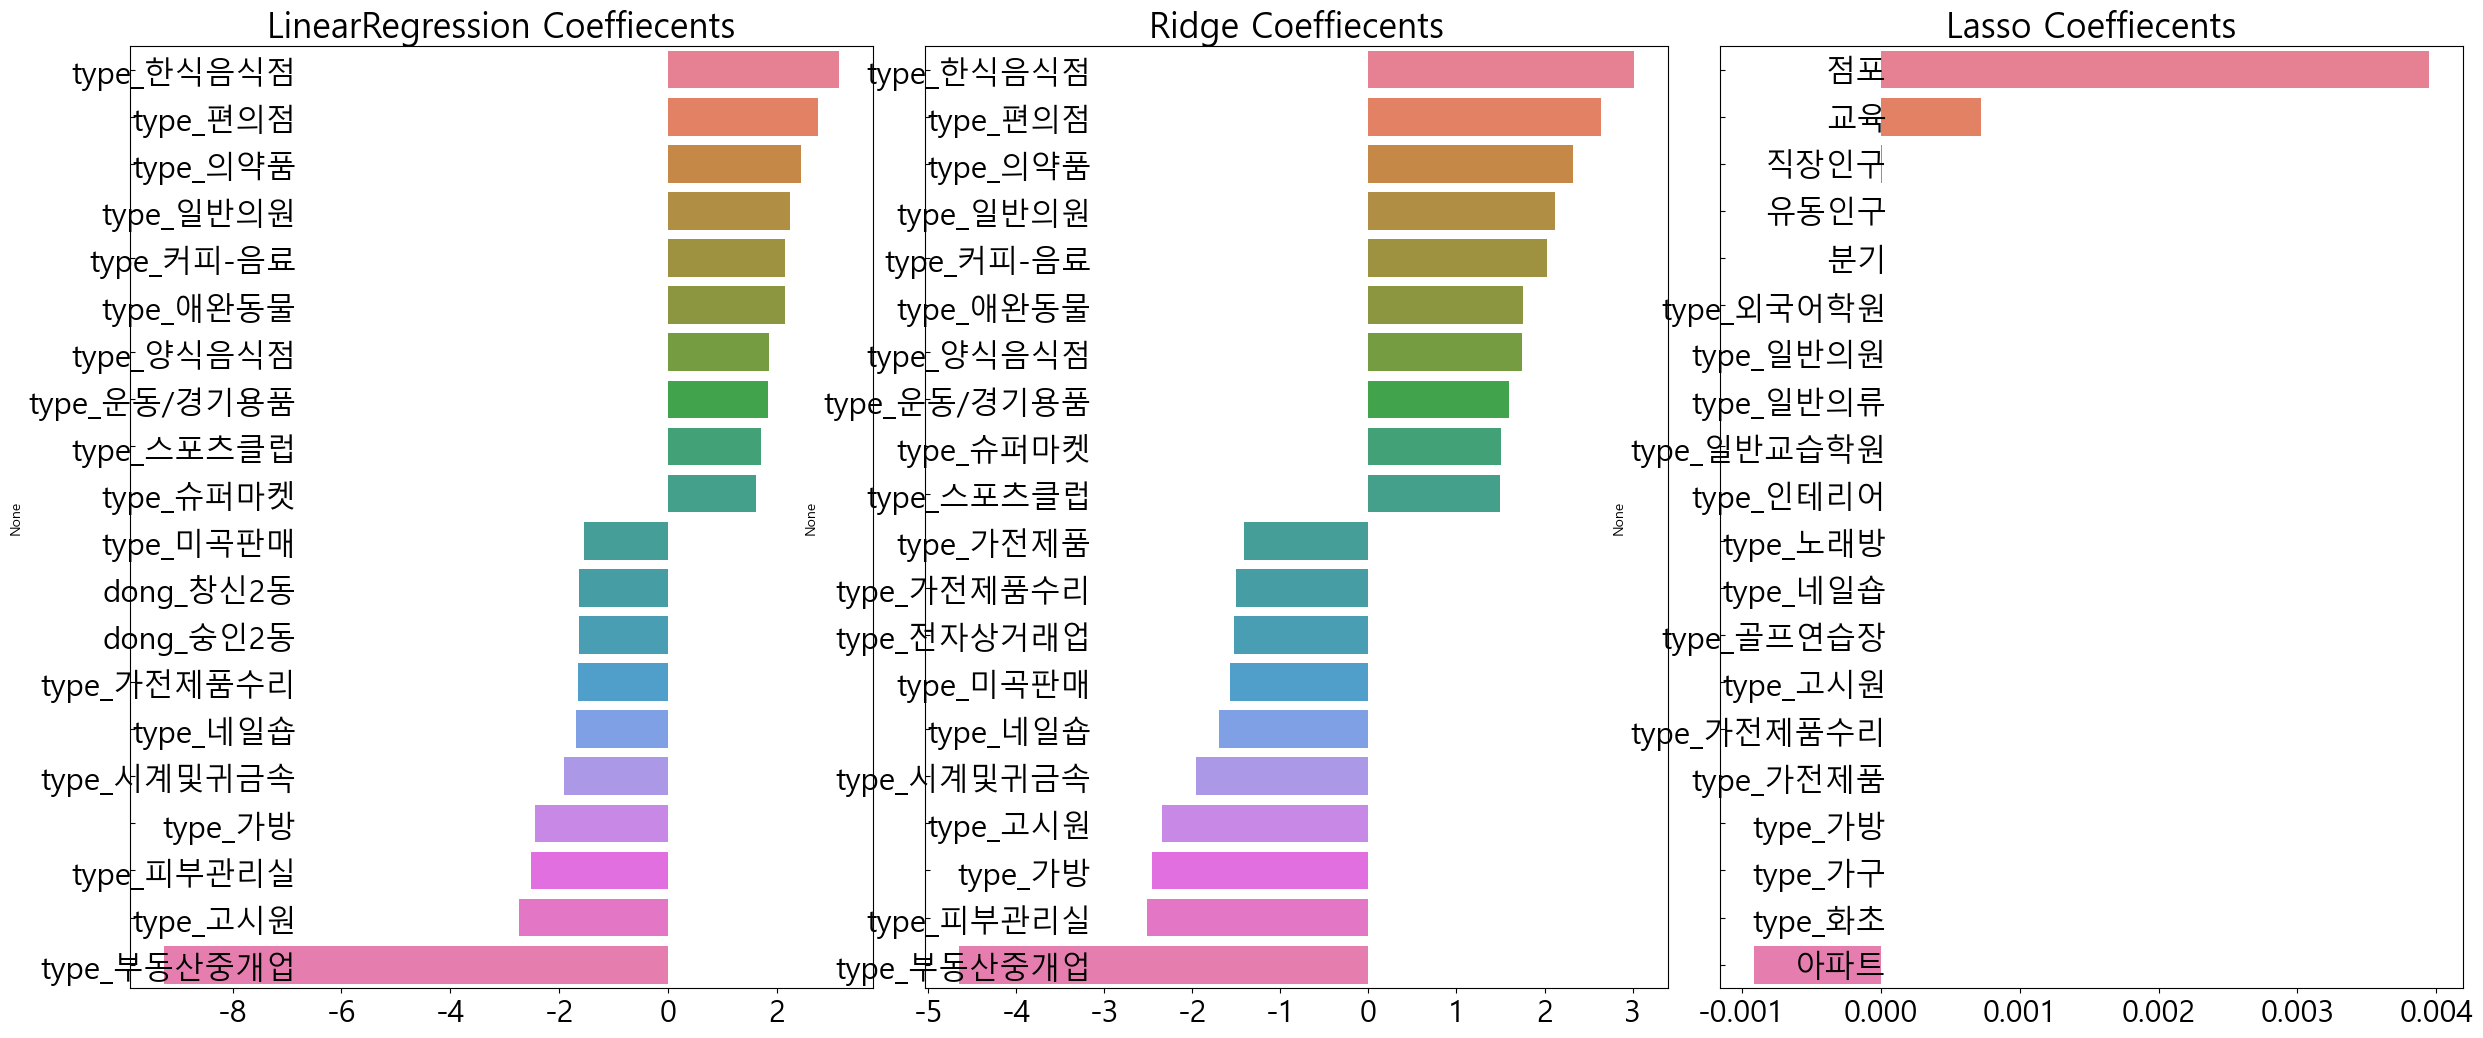

In [198]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

## 스탠다드 스케일링 진행 후 모델링 진행

In [155]:
X_train.columns

Index(['점포', '직장인구', '아파트', '교통', '의료', '교육', '기타', '유동인구', 'dong_가회동',
       'dong_교남동', 'dong_무악동', 'dong_부암동', 'dong_사직동', 'dong_삼청동', 'dong_숭인1동',
       'dong_숭인2동', 'dong_이화동', 'dong_종로1?2?3?4가동', 'dong_종로5?6가동',
       'dong_창신1동', 'dong_창신2동', 'dong_창신3동', 'dong_청운효자동', 'dong_평창동',
       'dong_혜화동', 'type_PC방', 'type_가구', 'type_가방', 'type_가전제품',
       'type_가전제품수리', 'type_고시원', 'type_골프연습장', 'type_네일숍', 'type_노래방',
       'type_당구장', 'type_문구', 'type_미곡판매', 'type_미용실', 'type_반찬가게',
       'type_부동산중개업', 'type_분식전문점', 'type_서적', 'type_섬유제품', 'type_세탁소',
       'type_수산물판매', 'type_슈퍼마켓', 'type_스포츠 강습', 'type_스포츠클럽', 'type_시계및귀금속',
       'type_신발', 'type_안경', 'type_애완동물', 'type_양식음식점', 'type_여관', 'type_예술학원',
       'type_외국어학원', 'type_운동/경기용품', 'type_육류판매', 'type_의료기기', 'type_의약품',
       'type_인테리어', 'type_일반교습학원', 'type_일반의류', 'type_일반의원', 'type_일식음식점',
       'type_자동차미용', 'type_자동차수리', 'type_전자상거래업', 'type_제과점', 'type_조명용품',
       'type_중식음식점', 'type_철물점', 'type_청과상', 't

In [156]:
temp = X_train[['점포', '직장인구', '아파트', '교통', '의료', '교육', '기타', '유동인구']]

In [176]:
temp.describe()

,점포,직장인구,아파트,교통,의료,교육,기타,유동인구
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2.426000e+03
mean,37.035449,20138.023495,138.481451,31.673949,14.114180,9.281121,20.695383,5.070469e+06
std,139.743345,29931.968060,115.733885,24.323720,14.071092,12.125024,22.388361,3.825112e+06
min,0.000000,300.000000,9.000000,0.000000,1.000000,0.000000,3.000000,7.854360e+05
25%,5.000000,1942.000000,24.000000,14.000000,4.000000,2.000000,8.000000,2.174348e+06
50%,11.000000,6669.000000,126.000000,26.000000,9.000000,4.000000,12.000000,3.817973e+06
75%,26.000000,15588.000000,214.000000,36.000000,16.000000,14.000000,22.000000,6.660285e+06
max,2527.000000,97451.000000,326.000000,91.000000,47.000000,39.000000,77.000000,1.421170e+07


In [157]:
temp1 = X_train[['dong_가회동',
       'dong_교남동', 'dong_무악동', 'dong_부암동', 'dong_사직동', 'dong_삼청동', 'dong_숭인1동',
       'dong_숭인2동', 'dong_이화동', 'dong_종로1?2?3?4가동', 'dong_종로5?6가동',
       'dong_창신1동', 'dong_창신2동', 'dong_창신3동', 'dong_청운효자동', 'dong_평창동',
       'dong_혜화동', 'type_PC방', 'type_가구', 'type_가방', 'type_가전제품',
       'type_가전제품수리', 'type_고시원', 'type_골프연습장', 'type_네일숍', 'type_노래방',
       'type_당구장', 'type_문구', 'type_미곡판매', 'type_미용실', 'type_반찬가게',
       'type_부동산중개업', 'type_분식전문점', 'type_서적', 'type_섬유제품', 'type_세탁소',
       'type_수산물판매', 'type_슈퍼마켓', 'type_스포츠 강습', 'type_스포츠클럽', 'type_시계및귀금속',
       'type_신발', 'type_안경', 'type_애완동물', 'type_양식음식점', 'type_여관', 'type_예술학원',
       'type_외국어학원', 'type_운동/경기용품', 'type_육류판매', 'type_의료기기', 'type_의약품',
       'type_인테리어', 'type_일반교습학원', 'type_일반의류', 'type_일반의원', 'type_일식음식점',
       'type_자동차미용', 'type_자동차수리', 'type_전자상거래업', 'type_제과점', 'type_조명용품',
       'type_중식음식점', 'type_철물점', 'type_청과상', 'type_치과의원', 'type_치킨전문점',
       'type_커피-음료', 'type_컴퓨터및주변장치판매', 'type_패스트푸드점', 'type_편의점',
       'type_피부관리실', 'type_한식음식점', 'type_한의원', 'type_핸드폰', 'type_호프-간이주점',
       'type_화장품', 'type_화초']]

In [158]:
temp_test = X_test[['점포', '직장인구', '아파트', '교통', '의료', '교육', '기타', '유동인구']]

In [159]:
temp1_test = X_test[['dong_가회동',
       'dong_교남동', 'dong_무악동', 'dong_부암동', 'dong_사직동', 'dong_삼청동', 'dong_숭인1동',
       'dong_숭인2동', 'dong_이화동', 'dong_종로1?2?3?4가동', 'dong_종로5?6가동',
       'dong_창신1동', 'dong_창신2동', 'dong_창신3동', 'dong_청운효자동', 'dong_평창동',
       'dong_혜화동', 'type_PC방', 'type_가구', 'type_가방', 'type_가전제품',
       'type_가전제품수리', 'type_고시원', 'type_골프연습장', 'type_네일숍', 'type_노래방',
       'type_당구장', 'type_문구', 'type_미곡판매', 'type_미용실', 'type_반찬가게',
       'type_부동산중개업', 'type_분식전문점', 'type_서적', 'type_섬유제품', 'type_세탁소',
       'type_수산물판매', 'type_슈퍼마켓', 'type_스포츠 강습', 'type_스포츠클럽', 'type_시계및귀금속',
       'type_신발', 'type_안경', 'type_애완동물', 'type_양식음식점', 'type_여관', 'type_예술학원',
       'type_외국어학원', 'type_운동/경기용품', 'type_육류판매', 'type_의료기기', 'type_의약품',
       'type_인테리어', 'type_일반교습학원', 'type_일반의류', 'type_일반의원', 'type_일식음식점',
       'type_자동차미용', 'type_자동차수리', 'type_전자상거래업', 'type_제과점', 'type_조명용품',
       'type_중식음식점', 'type_철물점', 'type_청과상', 'type_치과의원', 'type_치킨전문점',
       'type_커피-음료', 'type_컴퓨터및주변장치판매', 'type_패스트푸드점', 'type_편의점',
       'type_피부관리실', 'type_한식음식점', 'type_한의원', 'type_핸드폰', 'type_호프-간이주점',
       'type_화장품', 'type_화초']]

In [168]:
# 데이터 값 간의 차이를 줄이기 위해 스케일링 진행
# 표준 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(temp)
# 훈련세트로 학습된 변환기를
temp_scaled = ss.transform(temp)
# 테스트 세트에도 적용
temp_test_scaled = ss.transform(temp_test)

In [170]:
temp_scaled.shape

(2426, 8)

In [171]:
temp_scale = pd.DataFrame(temp_scaled)

In [173]:
temp1.shape

(2426, 78)

In [172]:
temp_scale.shape

(2426, 8)

In [178]:
temp1[['점포', '직장인구', '아파트', '교통', '의료', '교육', '기타', '유동인구']] = temp_scaled

C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_6072\719581941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1[['점포', '직장인구', '아파트', '교통', '의료', '교육', '기타', '유동인구']] = temp_scaled
C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_6072\719581941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1[['점포', '직장인구', '아파트', '교통', '의료', '교육', '기타', '유동인구']] = temp_scaled
C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_6072\719581941.py:1: SettingWithCopyWarning: 
A value is trying to be set o

In [179]:
temp1

,dong_가회동,dong_교남동,dong_무악동,dong_부암동,dong_사직동,dong_삼청동,dong_숭인1동,dong_숭인2동,dong_이화동,dong_종로1?2?3?4가동,...,type_화장품,type_화초,점포,직장인구,아파트,교통,의료,교육,기타,유동인구
2534,True,False,False,False,False,False,False,False,False,False,...,False,False,-0.243607,-0.281029,-0.107868,-0.397799,-0.932187,-0.270663,-0.567170,-0.968906
24,True,False,False,False,False,False,False,False,False,False,...,False,False,-0.243607,-0.281029,-0.107868,-0.397799,-0.932187,-0.270663,-0.567170,-0.997472
1728,False,False,False,False,False,False,False,False,True,False,...,False,False,-0.243607,-0.497999,0.635369,-0.109954,-0.150281,2.451542,-0.567170,-0.335573
375,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.222135,-0.661437,0.652653,-1.302452,-0.647857,-0.765610,-0.790546,0.202665
221,False,False,False,False,False,False,False,False,True,False,...,False,False,-0.193505,-0.497999,0.635369,-0.109954,-0.150281,2.451542,-0.567170,-0.428533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.143403,-0.661437,0.652653,-1.302452,-0.647857,-0.765610,-0.790546,0.172054
2859,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.172033,-0.629257,-0.989382,-0.767884,-0.363528,-0.600627,-0.254443,-0.537670
1599,False,False,False,False,True,False,False,False,False,False,...,False,False,-0.229292,0.925087,-0.427633,0.177890,0.062966,-0.518136,1.085815,-0.268022
1442,False,False,False,False,False,False,False,False,False,False,...,False,False,0.393406,-0.317787,1.620590,-0.233316,-0.718940,0.389265,-0.522494,-0.382729


In [149]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(train_scaled, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(train_scaled, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(train_scaled, y_train)

Lasso()

In [150]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 7.875119628235027e+17
Ridge 로그 변환된 RMSE: 5465495.675
Lasso 로그 변환된 RMSE: 2.105


C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


[7.875119628235027e+17, 5465495.675458316, 2.105342439442849]

In [209]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(train_scaled, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(train_scaled, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(train_scaled, y_train)

Lasso()

In [210]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 8292573317401779.0
Ridge 로그 변환된 RMSE: 4580868.104
Lasso 로그 변환된 RMSE: 2.105


C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


[8292573317401779.0, 4580868.1043944815, 2.105342439442849]

## 1번 데이터로 모델링 진행

In [4]:
model1_data = pd.read_csv('./data/1번모델링데이터.csv', low_memory=False)
model1_data.head()

,Unnamed: 0,분기,행정동,유동인구,00-06시,06-11시,11-14시,14-17시,17-21시,21-24시,매출,교통시설,교육시설,의료시설,기타집객시설,총직장인구,아파트단지수,점포수
0,0,20221,청운효자동,3627519,835484,751388,500316,500252,612787,427291,21382013402,26.0,14.0,4.0,102.0,10628,326,851
1,1,20221,사직동,3402653,498814,715937,612357,614747,655462,305336,68615304432,36.0,3.0,15.0,251.0,47822,87,2572
2,2,20221,삼청동,821735,180117,168701,133516,133838,128284,77280,28013026278,16.0,4.0,2.0,63.0,5862,9,645
3,3,20221,부암동,1283546,381526,273508,142836,136668,183994,165013,3384117221,38.0,19.0,1.0,90.0,4115,189,456
4,4,20221,평창동,823714,217418,168138,93628,94350,137279,112901,8247357311,91.0,4.0,6.0,170.0,23179,295,657


In [7]:
# 불필요한 컬럼 drop하여 삭제
model1_data.drop(['Unnamed: 0', '분기'], axis = 1, inplace = True)

In [12]:
model1_data

,행정동,유동인구,00-06시,06-11시,11-14시,14-17시,17-21시,21-24시,매출,교통시설,교육시설,의료시설,기타집객시설,총직장인구,아파트단지수,점포수
0,청운효자동,3627519,835484,751388,500316,500252,612787,427291,21382013402,26.0,14.0,4.0,102.0,10628,326,851
1,사직동,3402653,498814,715937,612357,614747,655462,305336,68615304432,36.0,3.0,15.0,251.0,47822,87,2572
2,삼청동,821735,180117,168701,133516,133838,128284,77280,28013026278,16.0,4.0,2.0,63.0,5862,9,645
3,부암동,1283546,381526,273508,142836,136668,183994,165013,3384117221,38.0,19.0,1.0,90.0,4115,189,456
4,평창동,823714,217418,168138,93628,94350,137279,112901,8247357311,91.0,4.0,6.0,170.0,23179,295,657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,창신1동,3014244,678463,638724,443683,426279,489583,337514,94178745948,13.0,2.0,9.0,126.0,1307,24,1796
98,창신2동,5728461,1613227,1202977,640132,629246,904631,738248,12226118694,0.0,0.0,5.0,41.0,344,214,372
99,창신3동,1168610,341596,251963,122754,119163,175692,157445,1120692617,6.0,2.0,1.0,27.0,300,26,207
100,숭인1동,2131237,525767,436709,262320,270196,367825,268423,4622347985,14.0,1.0,3.0,47.0,460,44,297


### 1번 모델링 데이터의 왜도 확인

In [8]:
# model1_data : 원-핫인코딩 하기 전 df
# 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처 제외
feautres_index1 = model1_data.dtypes[model1_data.dtypes != 'object'].index

In [9]:
feautres_index1

Index(['유동인구', '00-06시', '06-11시', '11-14시', '14-17시', '17-21시', '21-24시',
       '매출', '교통시설', '교육시설', '의료시설', '기타집객시설', '총직장인구', '아파트단지수', '점포수'],
      dtype='object')

In [10]:
skew_features1 = model1_data[feautres_index1].apply(lambda x : skew(x))

In [11]:
#skew 정도가 1초과인  컬럼들만 추출
skew_features_top1 = skew_features1[skew_features1 > 1]
print(skew_features_top1.sort_values(ascending = False))
# 일반적으로 skew() 함수의 반환값이 1이상인 경우 왜곡도가 높다고 판단하지만
# 상황에 따라 편차는 있음

매출        3.421310
점포수       3.236762
총직장인구     2.618202
14-17시    2.445208
기타집객시설    2.418290
11-14시    2.375288
17-21시    2.011138
의료시설      1.792945
교육시설      1.757481
유동인구      1.558234
교통시설      1.486493
06-11시    1.372468
21-24시    1.043982
dtype: float64


### 로그변환, 스케일링 진행 전 data로 선형회귀, 릿지, 랏소 모델링 진행

In [13]:
# '서비스_업종_코드_명'와 '연령대' 열에 대해 원핫 인코딩 적용
one_hot_1 = pd.get_dummies(model1_data['행정동'], columns=['행정동'], prefix=['dong'])

# 기존 데이터프레임과 합치기
model1_one_hot = pd.concat([model1_data.drop(['행정동'], axis=1), one_hot_1], axis=1)

In [14]:
model1_one_hot

,유동인구,00-06시,06-11시,11-14시,14-17시,17-21시,21-24시,매출,교통시설,교육시설,...,['dong']_숭인2동,['dong']_이화동,['dong']_종로1?2?3?4가동,['dong']_종로5?6가동,['dong']_창신1동,['dong']_창신2동,['dong']_창신3동,['dong']_청운효자동,['dong']_평창동,['dong']_혜화동
0,3627519,835484,751388,500316,500252,612787,427291,21382013402,26.0,14.0,...,False,False,False,False,False,False,False,True,False,False
1,3402653,498814,715937,612357,614747,655462,305336,68615304432,36.0,3.0,...,False,False,False,False,False,False,False,False,False,False
2,821735,180117,168701,133516,133838,128284,77280,28013026278,16.0,4.0,...,False,False,False,False,False,False,False,False,False,False
3,1283546,381526,273508,142836,136668,183994,165013,3384117221,38.0,19.0,...,False,False,False,False,False,False,False,False,False,False
4,823714,217418,168138,93628,94350,137279,112901,8247357311,91.0,4.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3014244,678463,638724,443683,426279,489583,337514,94178745948,13.0,2.0,...,False,False,False,False,True,False,False,False,False,False
98,5728461,1613227,1202977,640132,629246,904631,738248,12226118694,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
99,1168610,341596,251963,122754,119163,175692,157445,1120692617,6.0,2.0,...,False,False,False,False,False,False,True,False,False,False
100,2131237,525767,436709,262320,270196,367825,268423,4622347985,14.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# 타깃과 피처
y_target = model1_one_hot['매출']
X_features = model1_one_hot.drop('매출', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

In [16]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+21, tolerance: 1.262e+20
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [19]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 11316167624.139
Ridge 로그 변환된 RMSE: 11410005336.818
Lasso 로그 변환된 RMSE: 11338367425.125


[11316167624.138943, 11410005336.818111, 11338367425.124657]

### 로그변환 후 스케일링 진행 전 data로 선형회귀, 릿지, 랏소 모델링 진행

In [21]:
# SalePrice 로그 변환
original_SalePrice1 = model1_one_hot['매출'] #원래값 저장
model1_one_hot['매출'] = np.log1p(model1_one_hot['매출']) #로그변환 값으로 타겟값을 대체

In [23]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.761e+01, tolerance: 1.801e-02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [24]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.128
Ridge 로그 변환된 RMSE: 0.144
Lasso 로그 변환된 RMSE: 0.715


[0.12759112097700057, 0.14381444492355483, 0.7147955556276564]

C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_6072\3124184909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num], palette = 'husl')
C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_6072\3124184909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num], palette = 'husl')
C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_6072\3124184909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_concat.values, y=coef_conc

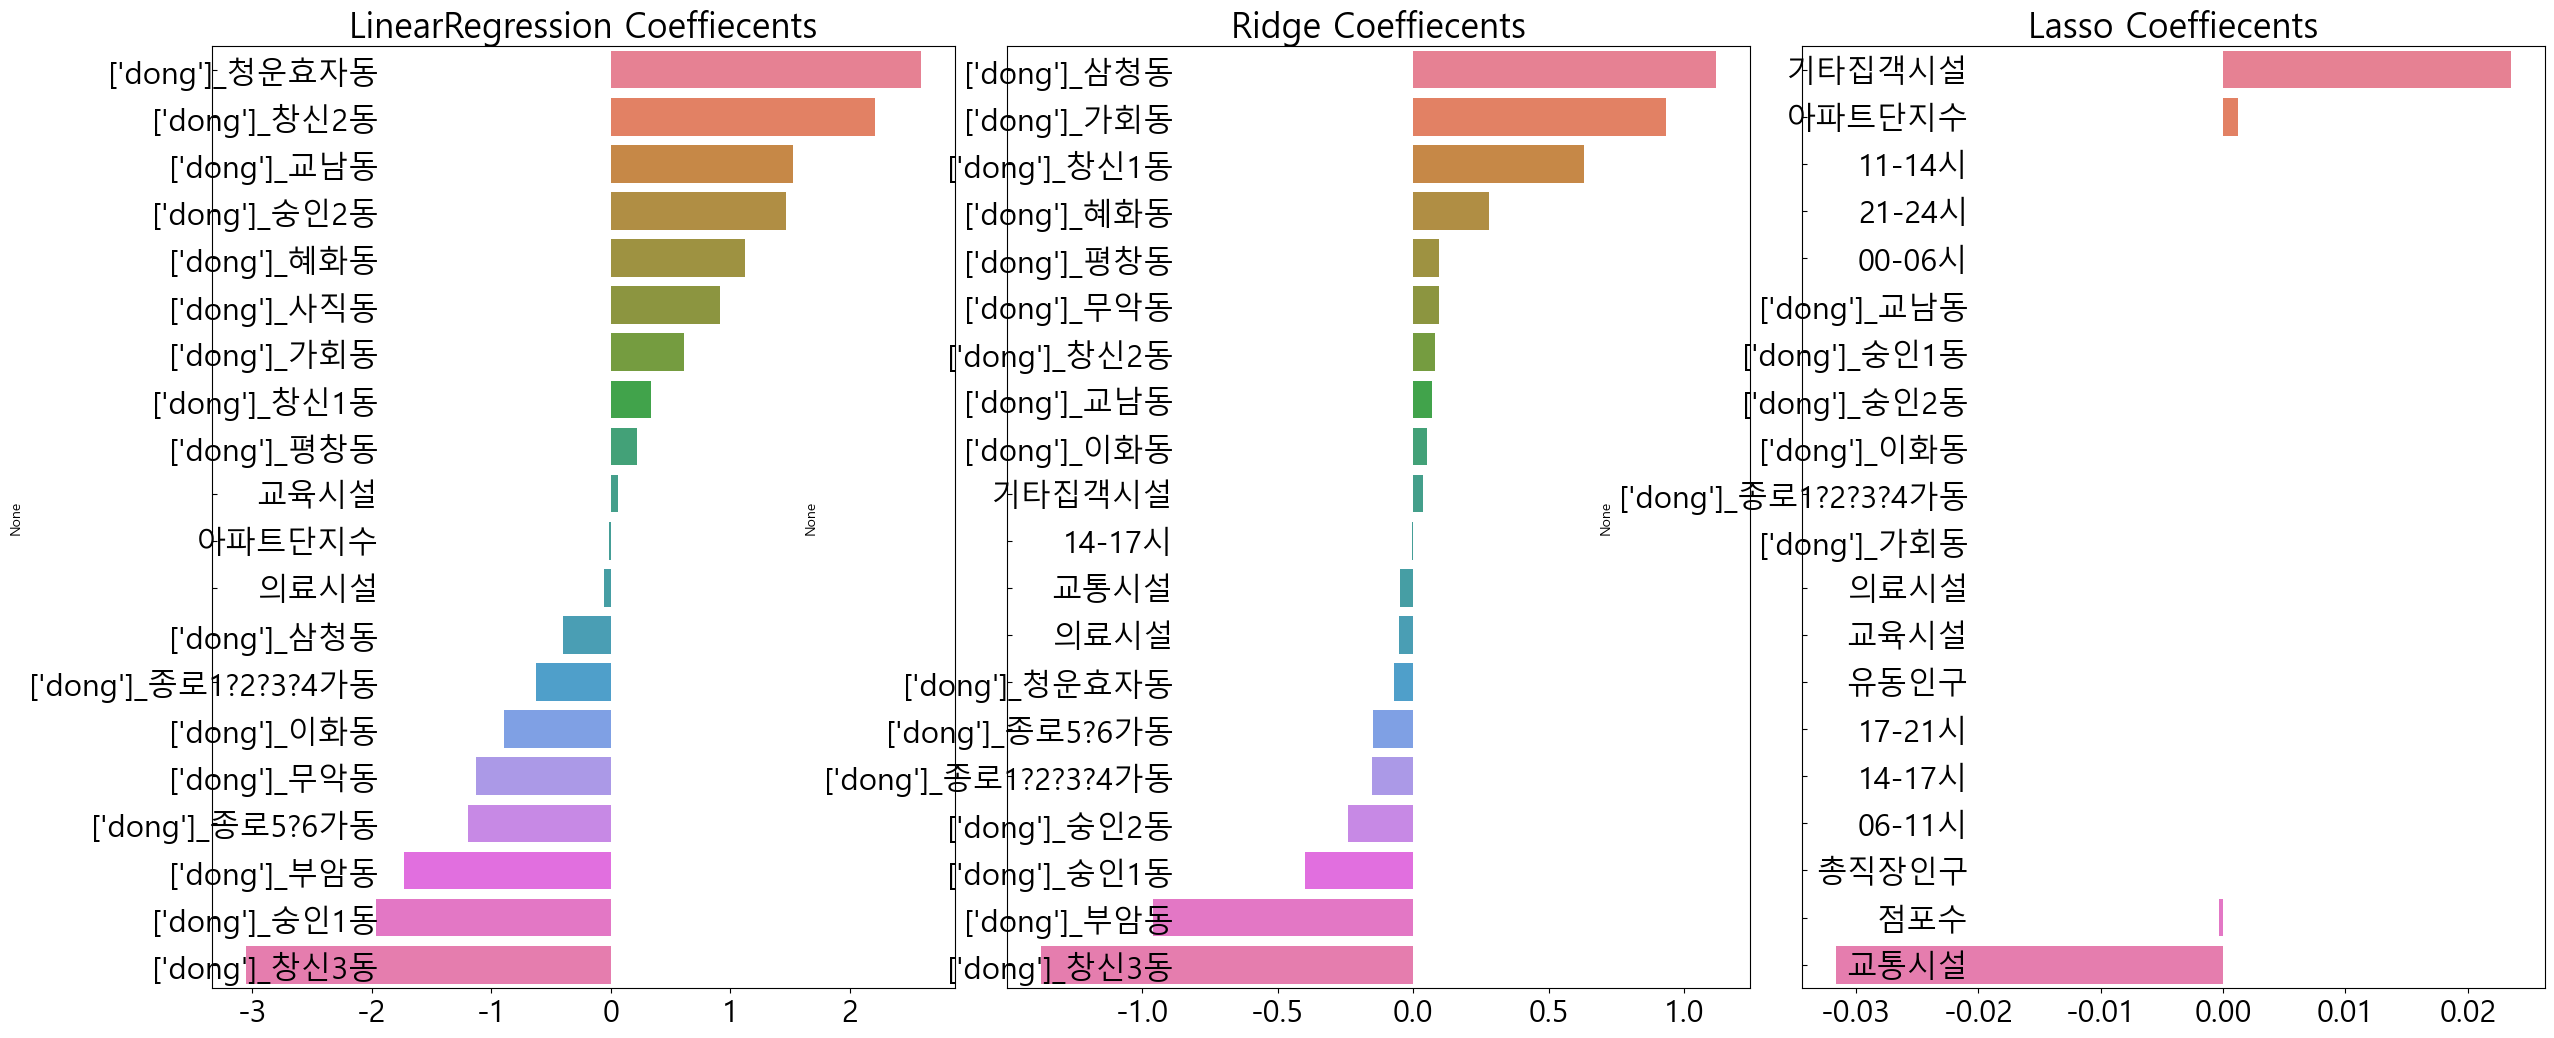

In [27]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 스탠다드 스케일링 진행 후 모델링

In [28]:
# 데이터 값 간의 차이를 줄이기 위해 스케일링 진행
# 표준 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
# 훈련세트로 학습된 변환기를
train_scaled = ss.transform(X_train)
# 테스트 세트에도 적용
test_scaled = ss.transform(X_test)

In [29]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(train_scaled, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(train_scaled, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(train_scaled, y_train)

Lasso()

In [30]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 14454453684.946
Ridge 로그 변환된 RMSE: 886878.275
Lasso 로그 변환된 RMSE: 25.135


C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


[14454453684.945885, 886878.2749556005, 25.1351591943311]

## 2번 데이터로 모델링

In [81]:
model2_data = pd.read_csv('./data/2번모델링데이터.csv', low_memory=False)
model2_data.head()

,Unnamed: 0,행정동,업종,분기,06-11시,11-14시,14-17시,17-21시,매출,교통시설,교육시설,의료시설,기타집객시설,총직장인구,아파트단지수,점포수
0,3,가회동,문구,20221,2.424681,0.490786,0.551591,2.610476,18257874148,22.0,6.0,1.0,71.0,11728,126,592
1,4,가회동,미용실,20221,10.081882,2.107637,0.864475,1.194021,18257874148,22.0,6.0,1.0,71.0,11728,126,592
2,5,가회동,반찬가게,20221,7.972980,0.100543,0.319478,0.031291,18257874148,22.0,6.0,1.0,71.0,11728,126,592
3,6,가회동,분식전문점,20221,0.639553,0.120469,0.126270,0.149219,18257874148,22.0,6.0,1.0,71.0,11728,126,592
4,10,가회동,스포츠 강습,20221,5.659608,2.002705,14.935723,2.156003,18257874148,22.0,6.0,1.0,71.0,11728,126,592


In [82]:
# 불필요한 컬럼 drop하여 삭제
model2_data.drop(['Unnamed: 0', '분기'], axis = 1, inplace = True)

In [46]:
model2_data.fillna(0, inplace = True)

In [83]:
model2_data

,행정동,업종,06-11시,11-14시,14-17시,17-21시,매출,교통시설,교육시설,의료시설,기타집객시설,총직장인구,아파트단지수,점포수
0,가회동,문구,2.424681,0.490786,0.551591,2.610476,18257874148,22.0,6.0,1.0,71.0,11728,126,592
1,가회동,미용실,10.081882,2.107637,0.864475,1.194021,18257874148,22.0,6.0,1.0,71.0,11728,126,592
2,가회동,반찬가게,7.972980,0.100543,0.319478,0.031291,18257874148,22.0,6.0,1.0,71.0,11728,126,592
3,가회동,분식전문점,0.639553,0.120469,0.126270,0.149219,18257874148,22.0,6.0,1.0,71.0,11728,126,592
4,가회동,스포츠 강습,5.659608,2.002705,14.935723,2.156003,18257874148,22.0,6.0,1.0,71.0,11728,126,592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,혜화동,한의원,8.327394,0.936040,0.845198,2.222685,60284801975,36.0,35.0,16.0,157.0,6669,308,1374
2423,혜화동,핸드폰,40.171080,4.198567,3.105712,1.637630,60284801975,36.0,35.0,16.0,157.0,6669,308,1374
2424,혜화동,호프-간이주점,301.368799,1.693354,3.644982,0.325118,60284801975,36.0,35.0,16.0,157.0,6669,308,1374
2425,혜화동,화장품,1.507223,0.143818,0.084876,0.068146,60284801975,36.0,35.0,16.0,157.0,6669,308,1374


### 2번 데이터 왜도 확인

In [84]:
# model1_data : 원-핫인코딩 하기 전 df
# 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처 제외
feautres_index2 = model2_data.dtypes[model2_data.dtypes != 'object'].index

In [85]:
feautres_index2

Index(['06-11시', '11-14시', '14-17시', '17-21시', '매출', '교통시설', '교육시설', '의료시설',
       '기타집객시설', '총직장인구', '아파트단지수', '점포수'],
      dtype='object')

In [86]:
skew_features2 = model2_data[feautres_index2].apply(lambda x : skew(x))

In [87]:
#skew 정도가 1초과인  컬럼들만 추출
skew_features_top2 = skew_features2[skew_features2 > 1]
print(skew_features_top2.sort_values(ascending = False))
# 일반적으로 skew() 함수의 반환값이 1이상인 경우 왜곡도가 높다고 판단하지만
# 상황에 따라 편차는 있음

17-21시    49.234020
14-17시    49.233788
06-11시    49.233522
11-14시    29.922099
매출         2.033546
점포수        1.933638
총직장인구      1.606298
기타집객시설     1.576796
교육시설       1.527817
의료시설       1.171881
교통시설       1.033665
dtype: float64


In [98]:
# '서비스_업종_코드_명'와 '연령대' 열에 대해 원핫 인코딩 적용
one_hot_2 = pd.get_dummies(model2_data[['행정동', '업종']], columns=['행정동', '업종'], prefix=['dong', 'type'])

# 기존 데이터프레임과 합치기
model2_one_hot = pd.concat([model2_data.drop(['행정동', '업종'], axis=1), one_hot_2], axis=1)

In [89]:
model2_one_hot

,06-11시,11-14시,14-17시,17-21시,매출,교통시설,교육시설,의료시설,기타집객시설,총직장인구,...,type_컴퓨터및주변장치판매,type_패스트푸드점,type_편의점,type_피부관리실,type_한식음식점,type_한의원,type_핸드폰,type_호프-간이주점,type_화장품,type_화초
0,2.424681,0.490786,0.551591,2.610476,18257874148,22.0,6.0,1.0,71.0,11728,...,False,False,False,False,False,False,False,False,False,False
1,10.081882,2.107637,0.864475,1.194021,18257874148,22.0,6.0,1.0,71.0,11728,...,False,False,False,False,False,False,False,False,False,False
2,7.972980,0.100543,0.319478,0.031291,18257874148,22.0,6.0,1.0,71.0,11728,...,False,False,False,False,False,False,False,False,False,False
3,0.639553,0.120469,0.126270,0.149219,18257874148,22.0,6.0,1.0,71.0,11728,...,False,False,False,False,False,False,False,False,False,False
4,5.659608,2.002705,14.935723,2.156003,18257874148,22.0,6.0,1.0,71.0,11728,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,8.327394,0.936040,0.845198,2.222685,60284801975,36.0,35.0,16.0,157.0,6669,...,False,False,False,False,False,True,False,False,False,False
2423,40.171080,4.198567,3.105712,1.637630,60284801975,36.0,35.0,16.0,157.0,6669,...,False,False,False,False,False,False,True,False,False,False
2424,301.368799,1.693354,3.644982,0.325118,60284801975,36.0,35.0,16.0,157.0,6669,...,False,False,False,False,False,False,False,True,False,False
2425,1.507223,0.143818,0.084876,0.068146,60284801975,36.0,35.0,16.0,157.0,6669,...,False,False,False,False,False,False,False,False,True,False


In [99]:
# 타깃과 피처
y_target = model2_one_hot['매출']
X_features = model2_one_hot.drop('매출', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

In [91]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.552e+23, tolerance: 5.891e+21
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [92]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 225343382177.881
Ridge 로그 변환된 RMSE: 840107930009.678
Lasso 로그 변환된 RMSE: 903513656054.86


[225343382177.88083, 840107930009.6783, 903513656054.8596]

In [93]:
# SalePrice 로그 변환
original_SalePrice2 = model2_one_hot['매출'] #원래값 저장
model2_one_hot['매출'] = np.log1p(model2_one_hot['매출']) #로그변환 값으로 타겟값을 대체

In [95]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [96]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.485
Ridge 로그 변환된 RMSE: 0.831
Lasso 로그 변환된 RMSE: 0.588


[0.48547801361429077, 0.8309378188363438, 0.5884035257093063]

C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_6072\3124184909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num], palette = 'husl')
C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_6072\3124184909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num], palette = 'husl')
C:\Users\Gun Won Park\AppData\Local\Temp\ipykernel_6072\3124184909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_concat.values, y=coef_conc

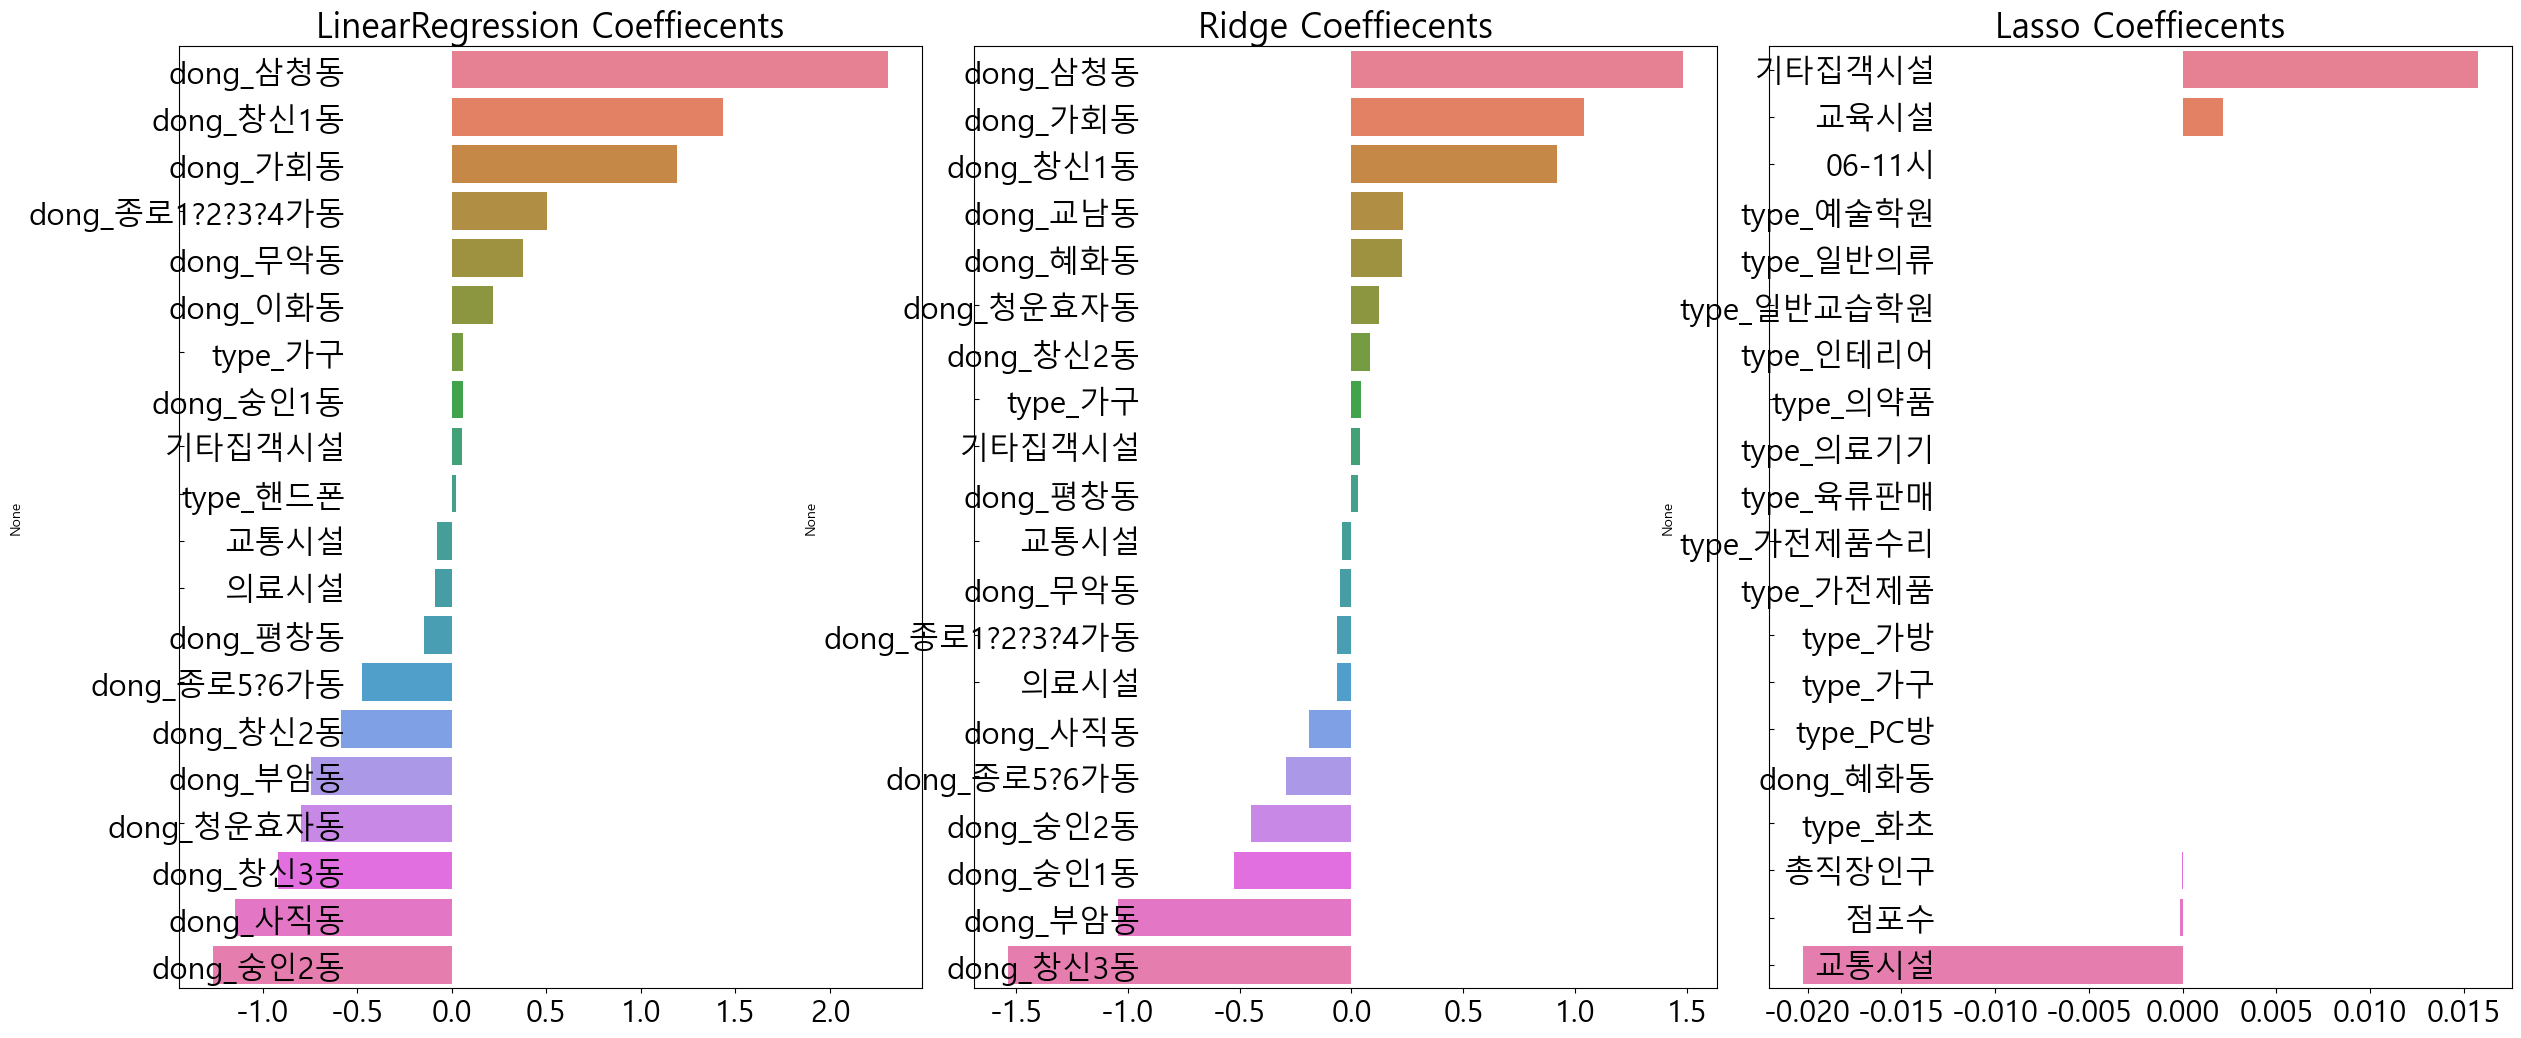

In [97]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 스케일링 진행 후 모델링 진행

In [100]:
# 데이터 값 간의 차이를 줄이기 위해 스케일링 진행
# 표준 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
# 훈련세트로 학습된 변환기를
train_scaled = ss.transform(X_train)
# 테스트 세트에도 적용
test_scaled = ss.transform(X_test)

In [101]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(train_scaled, y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(train_scaled, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(train_scaled, y_train)

C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.552e+23, tolerance: 5.891e+21
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [102]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 8.713492209506949e+27
Ridge 로그 변환된 RMSE: 1832288873124694.0
Lasso 로그 변환된 RMSE: 325663579522141.25


C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


[8.713492209506949e+27, 1832288873124694.0, 325663579522141.25]